# Import necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import urllib.request

# Set up environment and URL for IP webcam image

In [7]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
url = 'http://192.168.45.90:8080/photo.jpg'
filename = 'captured_image.jpg'

# Download the image from the IP Webcam and save it
urllib.request.urlretrieve(url, filename)
print("Image captured and saved to " + filename)

Image captured and saved to captured_image.jpg


# Load necessary functions from Keras

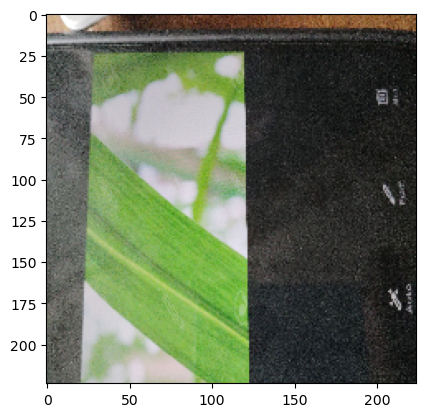

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step
Prediction: [[0.33089477 0.3471805  0.3219248 ]]
Prediction shape: (1, 3)
Predicted class index: 1
Number of class labels: 3
Predicted class: RedRust
Confidence: 34.72
SOLUTION: A weekly dusting of sulfur can prevent and treat rust fungus. Neem oil, a botanical fungicide and pesticide, also controls rust.


In [8]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the model
model = keras.models.load_model('C:/LEAF_Project/model.keras')

# Load the captured image
test_image_path = filename  # Use the saved image path
img = load_img(test_image_path, target_size=(224, 224))  # Resize to match model input size

# Display the image
plt.imshow(img)
plt.show()

# Convert the image to a NumPy array and expand dimensions for the model
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Model expects a batch of images

# Make a prediction on the test image
prediction = model.predict(img_array)

# Check prediction output
print("Prediction:", prediction)
print("Prediction shape:", prediction.shape)

# Get the predicted class index
predicted_class = np.argmax(prediction)

# Class labels (should match the model output)
class_labels = ["RedRot", "RedRust", "healthy"]

# Print predicted class index and number of class labels
print("Predicted class index:", predicted_class)
print("Number of class labels:", len(class_labels))

# Ensure predicted class is within valid range
if predicted_class < len(class_labels):
    print("Predicted class:", class_labels[predicted_class])
    print("Confidence:", round(np.max(prediction[0]) * 100, 2))
else:
    print("Error: Predicted class index is out of range.")

# Provide solution based on the predicted class
if predicted_class < len(class_labels):  # Ensure valid class prediction
    if class_labels[predicted_class] == "RedRot":
        solution = "The progress of red rot can be stopped or slowed with a treatment of aluminium alkoxide solution."
    elif class_labels[predicted_class] == "RedRust":
        solution = "A weekly dusting of sulfur can prevent and treat rust fungus. Neem oil, a botanical fungicide and pesticide, also controls rust."
    else:
        solution = "The plant is healthy."
    
    print("SOLUTION:", solution)
else:
    print("No solution available due to class index error.")